In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
pi = 3.141592

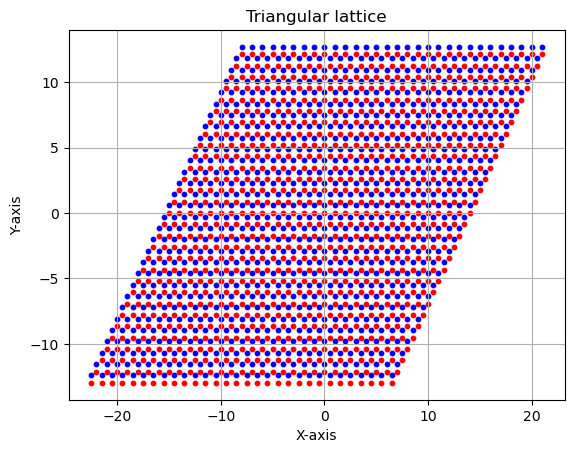

In [12]:
# Defining the Base lattice  - (TRIANGULAR LATICE)
# lattice translation vectors
A1 = [1, 0]
A2 = [1/2, np.sqrt(3)/2]
# number of points along each direction vectors
n = 15
# Lattice generation and visualization
subL1_x = []
subL1_y = []
subL2_x = []
subL2_y = []
for i in range(-n, n):
    for j in range(-n, n):
        subL1_x.append((A1[0] * i) + (A2[0] * j))
        subL1_y.append((A1[1] * i) + (A2[1] * j))
        subL2_x.append((A1[0] * i) + (A2[0] * j))
        subL2_y.append((A1[1] * i) + (A2[1] * j) + (1/np.sqrt(3)))
#print(triX_x)
#print(triX_y)
# Plot the points
g = plt.figure();
plt.scatter(subL1_x, subL1_y, color='red', s=10)
plt.scatter(subL2_x, subL2_y, color='blue', s=10)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Triangular lattice')
plt.grid(True)
plt.show()

In [54]:
# Size of skyrmion
size = 2
# skyrmion crystal translation vectors
T1 = np.round(np.array([size + size/2, np.sqrt(3) * size/2 , 0]), 6)
T2 = np.round(np.array([0, np.sqrt(3) * size, 0]), 6)
T3 = np.round(np.array([0, 0, 1]), 6)
# area of skyrmion unit cell
area = np.dot(T1, np.cross(T2, T3))
# reciprocal lattice vectors of SkX
B1 = np.round((2 * pi * np.cross(T2, T3))/area, 6)
B2 = np.round((2 * pi * np.cross(T3, T1))/area, 6)
print(T1)
print(T2)
#print(T3)
#print(area)
#print(B1)
#print(B2)

[3.       1.732051 0.      ]
[0.       3.464102 0.      ]


In [55]:
# Triple - Q texture formation
e_vectors = np.round([[-1, 0], [1/2, -np.sqrt(3)/2], [1/2, np.sqrt(3)/2]], 6) # skyrmion
#e_vectors = np.round([[0, -1], [-np.sqrt(3)/2, 1/2], [np.sqrt(3)/2, 1/2]], 6) # antiskyrmion
Q_vectors = np.round([[B1[0], B1[1]], [B2[0], B2[1]], [B2[0], -B2[1]]], 6)
#print(Q_vectors)
# spin texture definition
def spin_tex(x, y):
    point = np.array([x, y])
    mx = np.sum([np.sin(np.dot(Q_vectors[i], point) + pi/3) * e_vectors[i][0] for i in range(3)])
    my = np.sum([np.sin(np.dot(Q_vectors[i], point) + pi/3) * e_vectors[i][1] for i in range(3)])
    mz = np.sum([np.cos(np.dot(Q_vectors[i], point) + pi/3) for i in range(3)])
    m = [mx, my, mz]
    m = np.round(m / np.linalg.norm(m), 6)
    return m
print(spin_tex(0,1))

[-0.773735 -0.605345  0.186794]


12
12


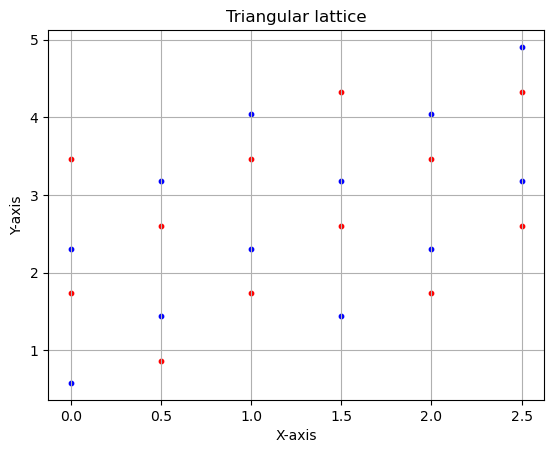

In [56]:
# Isolating a unit cell from SkX
unitcell1_x = []
unitcell1_y = []
unitcell2_x = []
unitcell2_y = []
# Bounds of unit cell
Xlow = 0
Xhigh = size + size/2
def Ylow(x):
    return T1[1] * (x) / T1[0] + np.sqrt(3)/4
def Yhigh(x):
    return T1[1] * (x) / T1[0] + np.linalg.norm(T2) + np.sqrt(3)/4
for i in range(len(subL1_x)):
    [x1, y1] = [subL1_x[i], subL1_y[i]]
    [x2, y2] = [subL2_x[i], subL2_y[i]]
    if x1 >= Xlow and x1 < Xhigh and y1 >= Ylow(x1) and y1 < Yhigh(x1):
        unitcell1_x.append(x1)  
        unitcell1_y.append(y1)
    if x2 >= Xlow and x2 < Xhigh and y2 >= Ylow(x2) and y2 < Yhigh(x2):
        unitcell2_x.append(x2)  
        unitcell2_y.append(y2)

print(len(unitcell1_x))
print(len(unitcell2_y))

g = plt.figure();
plt.scatter(unitcell1_x, unitcell1_y, color='red', s=10)
plt.scatter(unitcell2_x, unitcell2_y, color='blue', s=10)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Triangular lattice')
plt.grid(True)
plt.show()

In [57]:
[0, 1, 26, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 18, 19, 20, 21, 22, 24, 25]
# spin texture in unit cell
spins_cart_L1 = [spin_tex(unitcell1_x[i], unitcell1_y[i]) for i in range(len(unitcell1_x))]
spins_cart_L2 = [spin_tex(unitcell2_x[i], unitcell2_y[i]) for i in range(len(unitcell2_x))]

# getting the theta phi profile of skyrmion
def theta_profile(x, y, z):
    return np.arccos(z/np.linalg.norm([x, y, z]))
def phi_profile(x, y, z):
    [x, y, z] = np.round([x, y, z], 3)
    # Calculate the denominator and check for zero to avoid division by zero
    value = np.arctan2(y, x)
    if x == 0 and y == 0:
        return 0  # or some appropriate value or error handling
    elif value < 0:
        return value + (2*pi)
    else:
        return value

theta1 = [theta_profile(spins_cart_L1[i][0], spins_cart_L1[i][1], spins_cart_L1[i][2]) for i in range(len(unitcell1_x))]
phi1 = [phi_profile(spins_cart_L1[i][0], spins_cart_L1[i][1], spins_cart_L1[i][2]) for i in range(len(unitcell1_x))]
theta2 = [theta_profile(spins_cart_L2[i][0], spins_cart_L2[i][1], spins_cart_L2[i][2]) for i in range(len(unitcell2_x))]
phi2 = [phi_profile(spins_cart_L2[i][0], spins_cart_L2[i][1], spins_cart_L2[i][2]) for i in range(len(unitcell2_x))]

#print(theta)
#print(phi)

In [58]:

chi_ket_L1 = [[np.cos(theta1[i]/2), np.sin(theta1[i]/2) * np.exp(1j * phi1[i])] for i in range(len(unitcell1_x))]
chi_bra_L1 = [[np.cos(theta1[i]/2), np.sin(theta1[i]/2) * np.exp(-1j * phi1[i])] for i in range(len(unitcell1_x))]

chi_ket_L2 = [[np.cos(theta2[i]/2), np.sin(theta2[i]/2) * np.exp(1j * phi2[i])] for i in range(len(unitcell2_x))]
chi_bra_L2 = [[np.cos(theta2[i]/2), np.sin(theta2[i]/2) * np.exp(-1j * phi2[i])] for i in range(len(unitcell2_x))]

In [59]:
# neighbour table formation
L1D1 = [-1/2, -1/(2*np.sqrt(3))]
L1D2 = [0, 1/np.sqrt(3)]
L1D3 = [1/2, -1/(2*np.sqrt(3))]
L2D1 = [-1/2, 1/(2*np.sqrt(3))]
L2D2 = [1/2, 1/(2*np.sqrt(3))]
L2D3 = [0, -1/np.sqrt(3)]

L1NN1 = []
L1NN2 = []
L1NN3 = []
L2NN1 = []
L2NN2 = []
L2NN3 = []

def neig_L1_1(i, j):
    [x, y] = np.round([unitcell1_x[i], unitcell1_y[i]], 6)
    [x1, y1] = np.round([unitcell2_x[j], unitcell2_y[j]], 6)
    # NN1 
    if np.allclose([x1, y1], np.round([x + L1D1[0] , y + L1D1[1]], 6)):
        L1NN1.append(j)
    elif np.allclose([x1, y1], np.round([x + L1D1[0] + T1[0], y + L1D1[1] + T1[1]], 6)):
        L1NN1.append(j)
    return 

def neig_L1_2(i, j):
    [x, y] = np.round([unitcell1_x[i], unitcell1_y[i]], 6)
    [x1, y1] = np.round([unitcell2_x[j], unitcell2_y[j]], 6)
    # NN1 
    if np.allclose([x1, y1], np.round([x + L1D2[0] , y + L1D2[1]], 6)):
        L1NN2.append(j)
    elif np.allclose([x1, y1], np.round([x + L1D2[0] - T2[0], y + L1D2[1] - T2[1]], 6)):
        L1NN2.append(j)
    return 

def neig_L1_3(i, j):
    [x, y] = np.round([unitcell1_x[i], unitcell1_y[i]], 6)
    [x1, y1] = np.round([unitcell2_x[j], unitcell2_y[j]], 6)
    # NN1 
    if np.allclose([x1, y1], np.round([x + L1D3[0] , y + L1D3[1]], 6)):
        L1NN3.append(j)
    elif np.allclose([x1, y1], np.round([x + L1D3[0] + T2[0], y + L1D3[1] + T2[1]], 6)):
        L1NN3.append(j)
    elif np.allclose([x1, y1], np.round([x + L1D3[0] - T1[0], y + L1D3[1] - T1[1]], 6)):
        L1NN3.append(j)
    return 

def neig_L2_1(i, j):
    [x, y] = np.round([unitcell2_x[i], unitcell2_y[i]], 6)
    [x1, y1] = np.round([unitcell1_x[j], unitcell1_y[j]], 6)
    # NN1 
    if np.allclose([x1, y1], np.round([x + L2D1[0] , y + L2D1[1]], 6)):
        L2NN1.append(j)
    elif np.allclose([x1, y1], np.round([x + L2D1[0] + T1[0], y + L2D1[1] + T1[1]], 6)):
        L2NN1.append(j)
    elif np.allclose([x1, y1], np.round([x + L2D1[0] - T2[0], y + L2D1[1] - T2[1]], 6)):
        L2NN1.append(j)
    return 

def neig_L2_2(i, j):
    [x, y] = np.round([unitcell2_x[i], unitcell2_y[i]], 6)
    [x1, y1] = np.round([unitcell1_x[j], unitcell1_y[j]], 6)
    # NN1 
    if np.allclose([x1, y1], np.round([x + L2D2[0] , y + L2D2[1]], 6)):
        L2NN2.append(j)
    elif np.allclose([x1, y1], np.round([x + L2D2[0] - T1[0], y + L2D2[1] - T1[1]], 6)):
        L2NN2.append(j)
    return 

def neig_L2_3(i, j):
    [x, y] = np.round([unitcell2_x[i], unitcell2_y[i]], 6)
    [x1, y1] = np.round([unitcell1_x[j], unitcell1_y[j]], 6)
    # NN1 
    if np.allclose([x1, y1], np.round([x + L2D3[0] , y + L2D3[1]], 6)):
        L2NN3.append(j)
    elif np.allclose([x1, y1], np.round([x + L2D3[0] + T2[0], y + L2D3[1] + T2[1]], 6)):
        L2NN3.append(j)
    return 

for i in range(len(unitcell1_x)):
    for j in range(len(unitcell2_x)):
        neig_L1_1(i, j)
        neig_L1_2(i, j)
        neig_L1_3(i, j)
        neig_L2_1(i, j)
        neig_L2_2(i, j)
        neig_L2_3(i, j)
        
print(L1NN1)
print(L1NN2)
print(L1NN3)
print(L2NN1)
print(L2NN2)
print(L2NN3)

[8, 11, 0, 1, 2, 3, 4, 5, 6, 7, 9, 10]
[3, 0, 1, 2, 9, 4, 5, 6, 7, 8, 10, 11]
[1, 4, 5, 6, 7, 2, 9, 10, 11, 0, 8, 3]
[9, 0, 5, 11, 1, 2, 3, 4, 10, 6, 7, 8]
[2, 3, 4, 5, 6, 7, 8, 9, 0, 10, 11, 1]
[1, 2, 3, 0, 5, 6, 7, 8, 9, 4, 10, 11]


In [60]:
# Hamiltonian definition
t = 1
def H(kx, ky):
    sub = len(unitcell1_x)
    k = [kx, ky]
    Hij = np.zeros((2*sub, 2*sub), dtype=np.complex128)
    for i in range(0,len(unitcell1_x)):
        n1, n2, n3, n4, n5, n6 = int(L1NN1[i]), int(L1NN2[i]), int(L1NN3[i]), int(L2NN1[i]), int(L2NN2[i]), int(L2NN3[i])  
        Hij[i][i] = 0
        Hij[i][n1 + sub] = t * np.dot(chi_bra_L1[i], chi_ket_L2[n1]) * np.exp(1j * np.dot(k, L1D1))
        Hij[i][n2 + sub] = t * np.dot(chi_bra_L1[i], chi_ket_L2[n2]) * np.exp(1j * np.dot(k, L1D2))
        Hij[i][n3 + sub] = t * np.dot(chi_bra_L1[i], chi_ket_L2[n3]) * np.exp(1j * np.dot(k, L1D3))
        Hij[i + sub][n4] = t * np.dot(chi_bra_L2[i], chi_ket_L1[n4]) * np.exp(1j * np.dot(k, L2D1))
        Hij[i + sub][n5] = t * np.dot(chi_bra_L2[i], chi_ket_L1[n5]) * np.exp(1j * np.dot(k, L2D2))
        Hij[i + sub][n6] = t * np.dot(chi_bra_L2[i], chi_ket_L1[n6]) * np.exp(1j * np.dot(k, L2D3))
    return Hij  

([<matplotlib.axis.YTick at 0x7f85489f0fa0>,
 [Text(0, 3.0, '$3.0$'),
  Text(0, 2.0, '$2.0$'),
  Text(0, 1.0, '$1.0$'),
  Text(0, 0.0, '$0$'),
  Text(0, -1.0, '$-1.0$'),
  Text(0, -2.0, '$-2.0$'),
  Text(0, -3.0, '$-3.0$')])

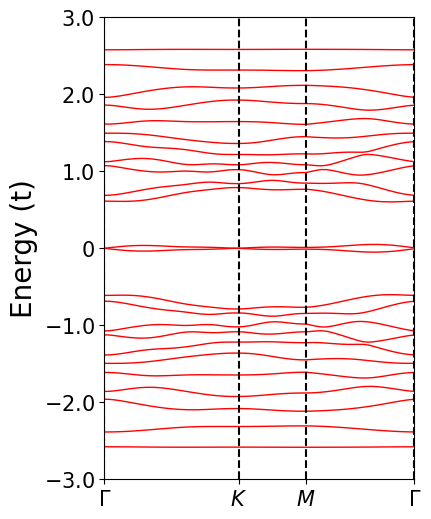

In [61]:
# Path in the reciprocal space
GK = []
KM = []
MG = []

Len = np.linalg.norm(B1)/2
d = 25
for i in range(0, int(d+1)):
    GK.append([0 + (Len * i/d), 0 + (Len * i/(np.sqrt(3)*d))])

for i in range(0, int( (d/2) + 1)):
    KM.append([Len , Len * (1 - (2*i/d))/np.sqrt(3)])
    
for i in range(0, int((0.87*d) + 1)):
    MG.append([Len * (1 - (i/(0.87 * d))), 0])
###############################################    
   
# Obtaining band
slno = [0]
band = np.zeros((2*len(unitcell1_x), len(GK) + len(KM) + len(MG)))
for i in range(0, len(GK)):
    slno.append(slno[-1]+1)
    eigen = np.sort(np.linalg.eigvalsh(H(GK[i][0], GK[i][1])))
    for b_index in range(0, 2*len(unitcell1_x)):
        band[b_index][i] = eigen[b_index]

for i in range(0, len(KM)): 
    slno.append(slno[-1]+1)
    eigen = np.sort(np.linalg.eigvalsh(H(KM[i][0], KM[i][1])))
    for b_index in range(0, 2*len(unitcell1_x)):
        band[b_index][len(GK) + i] = eigen[b_index]

for i in range(0, len(MG)): 
    slno.append(slno[-1]+1)
    eigen = np.sort(np.linalg.eigvalsh(H(MG[i][0], MG[i][1])))
    for b_index in range(0, 2*len(unitcell1_x)):
        band[b_index][len(GK) + len(KM) + i] = eigen[b_index]

# Remove the last element
slno = slno[:-1]
    
f = plt.figure(figsize=(4,6));   
for b_index in range(0, 2*len(unitcell1_x)):
    plt.plot( slno, band[b_index], c = 'red', linestyle='-', linewidth = 1 )

plt.axvline(len(GK),c='k', linestyle='--')
plt.axvline(len(GK) + len(KM),c='k', linestyle='--')
plt.axvline(0,c='k', linestyle='--')
plt.axvline(len(GK) + len(KM) + len(MG)-1,c='k', linestyle='--')
plt.ylabel("Energy (t)", fontsize=20);         plt.axis('tight');
plt.xlim(0,len(GK) + len(KM) + len(MG)-1)
plt.ylim(-3, 3)
# Customize x-axis ticks with Greek symbols
plt.xticks([0, len(GK), len(GK) + len(KM) , len(GK) + len(KM) + len(MG)-1],
           [r'$\Gamma$', r'$K$', r'$M$', r'$\Gamma$'],fontsize=15)
plt.yticks([ 3, 2, 1, 0,  -1.0,  -2.0,  -3.0], [ r'$3.0$', r'$2.0$', r'$1.0$',  r'$0$',  r'$-1.0$', r'$-2.0$', r'$-3.0$'], size=15)    


In [62]:
# define the derivative of the hamiltonian (kx):
def H_dx(kx, ky):
    sub = len(unitcell1_x)
    k = [kx, ky]
    Hij = np.zeros((2*sub, 2*sub), dtype=np.complex128)
    for i in range(0,len(unitcell1_x)):
        n1, n2, n3, n4, n5, n6 = int(L1NN1[i]), int(L1NN2[i]), int(L1NN3[i]), int(L2NN1[i]), int(L2NN2[i]), int(L2NN3[i])  
        Hij[i][i] = 0
        Hij[i][n1 + sub] = t * np.dot(chi_bra_L1[i], chi_ket_L2[n1]) * np.exp(1j * np.dot(k, L1D1)) * (1j * L1D1[0])
        Hij[i][n2 + sub] = t * np.dot(chi_bra_L1[i], chi_ket_L2[n2]) * np.exp(1j * np.dot(k, L1D2)) * (1j * L1D2[0])
        Hij[i][n3 + sub] = t * np.dot(chi_bra_L1[i], chi_ket_L2[n3]) * np.exp(1j * np.dot(k, L1D3)) * (1j * L1D3[0])
        Hij[i + sub][n4] = t * np.dot(chi_bra_L2[i], chi_ket_L1[n4]) * np.exp(1j * np.dot(k, L2D1)) * (1j * L2D1[0])
        Hij[i + sub][n5] = t * np.dot(chi_bra_L2[i], chi_ket_L1[n5]) * np.exp(1j * np.dot(k, L2D2)) * (1j * L2D2[0])
        Hij[i + sub][n6] = t * np.dot(chi_bra_L2[i], chi_ket_L1[n6]) * np.exp(1j * np.dot(k, L2D3)) * (1j * L2D3[0])
    return Hij  
                
def H_dy(kx, ky):
    sub = len(unitcell1_x)
    k = [kx, ky]
    Hij = np.zeros((2*sub, 2*sub), dtype=np.complex128)
    for i in range(0,len(unitcell1_x)):
        n1, n2, n3, n4, n5, n6 = int(L1NN1[i]), int(L1NN2[i]), int(L1NN3[i]), int(L2NN1[i]), int(L2NN2[i]), int(L2NN3[i])  
        Hij[i][i] = 0
        Hij[i][n1 + sub] = t * np.dot(chi_bra_L1[i], chi_ket_L2[n1]) * np.exp(1j * np.dot(k, L1D1)) * (1j * L1D1[1])
        Hij[i][n2 + sub] = t * np.dot(chi_bra_L1[i], chi_ket_L2[n2]) * np.exp(1j * np.dot(k, L1D2)) * (1j * L1D2[1])
        Hij[i][n3 + sub] = t * np.dot(chi_bra_L1[i], chi_ket_L2[n3]) * np.exp(1j * np.dot(k, L1D3)) * (1j * L1D3[1])
        Hij[i + sub][n4] = t * np.dot(chi_bra_L2[i], chi_ket_L1[n4]) * np.exp(1j * np.dot(k, L2D1)) * (1j * L2D1[1])
        Hij[i + sub][n5] = t * np.dot(chi_bra_L2[i], chi_ket_L1[n5]) * np.exp(1j * np.dot(k, L2D2)) * (1j * L2D2[1])
        Hij[i + sub][n6] = t * np.dot(chi_bra_L2[i], chi_ket_L1[n6]) * np.exp(1j * np.dot(k, L2D3)) * (1j * L2D3[1])
    return Hij  
###################

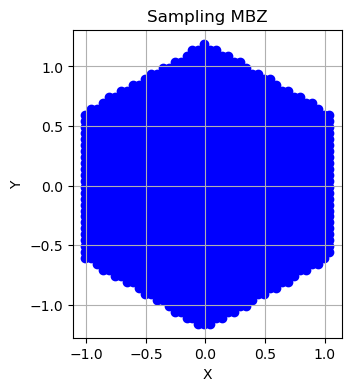

1522


In [63]:
a =  np.linalg.norm(B1)/np.sqrt(3)
dx = 0.05
kx = np.arange(-a, a, dx)
ky = kx

domain = []

for i in range(len(kx)):
    for j in range(len(kx)):
        x = kx[i]
        y = ky[j]
        if x <= 0 and x >= - np.sqrt(3) * a/2 :
            if y <= (x /np.sqrt(3) + a) and y >= (- x /np.sqrt(3) - a):
                domain.append([x, y])
        elif x >= 0 and x <= np.sqrt(3) *a/2 :
            if y <= (-x/np.sqrt(3) + a) and y >= (x /np.sqrt(3) - a):
                domain.append([x, y])
x_coords = [val[0] for val in domain]
y_coords = [val[1] for val in domain]
# Plotting
plt.figure(figsize=(4,4))
plt.scatter(x_coords, y_coords, color='blue')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sampling MBZ')
plt.grid(True)
plt.show()

print(len(domain))

In [64]:
eta = 10**-5

def E_value(kx, ky):
    eigenvalues = np.linalg.eigvalsh(H(kx, ky))
    return eigenvalues

def sorted_kets(kx, ky):
    eigenvalues, eigenvectors = np.linalg.eigh(H(kx,ky))
    a = np.transpose(eigenvectors)
    return a

def b_curvature(kx, ky, band_index):
    berry_curvature = 0
    
    band_ev = E_value(kx, ky)[band_index]
    filtered_ev = [ev for ev in E_value(kx, ky) if ev != band_ev]
    band_ket = sorted_kets(kx, ky)[band_index]
    filtered_ket = [vec for index, vec in enumerate(sorted_kets(kx, ky)) if index != band_index]
    
    dh_x = H_dx(kx, ky)
    dh_y = H_dy(kx, ky)
    
    for i in range(0, len(filtered_ket)):
        berry_curvature += (np.dot(np.conj(band_ket), np.dot(dh_y, filtered_ket[i])) * np.dot(np.conj(filtered_ket[i]), np.dot(dh_x, band_ket)) - np.dot(np.conj(band_ket), np.dot(dh_x, filtered_ket[i])) * np.dot(np.conj(filtered_ket[i]), np.dot(dh_y, band_ket))) / ((band_ev - filtered_ev[i])**2 + 1j * eta)
    
    return berry_curvature.imag

b_c_band = []     
for i in tqdm(range(0, len(domain))):
    kx = domain[i][0]
    ky = domain[i][1]
    b_c_band.append(b_curvature(kx, ky, 0))


100%|██████████| 1522/1522 [00:06<00:00, 241.48it/s]


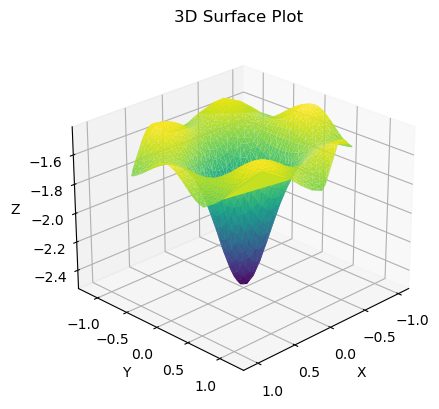

In [65]:
x, y = zip(*domain)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface using the z-values from the 'values' list
ax.plot_trisurf(x, y, b_c_band, cmap='viridis', linewidth=0.2)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Surface Plot')
ax.view_init(elev=  25, azim=45)
# Show the plot
plt.show()

In [66]:
# Band data and Berry curvature data generation
bands = []
for band_index in tqdm(range(0, 2*len(unitcell1_x))):
    for vec in domain:
        bands.append(E_value(vec[0], vec[1])[band_index])
            
berry_curvature = []
for band_index in tqdm(range(0, 2*len(unitcell1_x))):
    for vec in domain:
        berry_curvature.append(b_curvature(vec[0], vec[1], band_index))


100%|██████████| 24/24 [02:39<00:00,  6.64s/it]


In [67]:
Ef = [-4 + i/100 for i in range(701)]
kT = 0.00000001;

# Kubo formula implimentation
sigma = []
for fermi_energy in tqdm(Ef):
    energies = []
    bc_list = []
    for i in range(len(bands)):
        if bands[i] <= fermi_energy:
            energies.append(bands[i])
            bc_list.append(berry_curvature[i])
    if energies != []:
        conductivity = 0
        for i in range(len(energies)):
            conductivity += bc_list[i]/(1 + np.exp((energies[i] - fermi_energy)/kT))
        sigma.append(2 * pi * conductivity/(area * len(domain)))
    else:
        sigma.append(0)  # Append a default value if no tuples were selected


100%|██████████| 701/701 [00:22<00:00, 31.32it/s] 


(-3.0, 3.0)

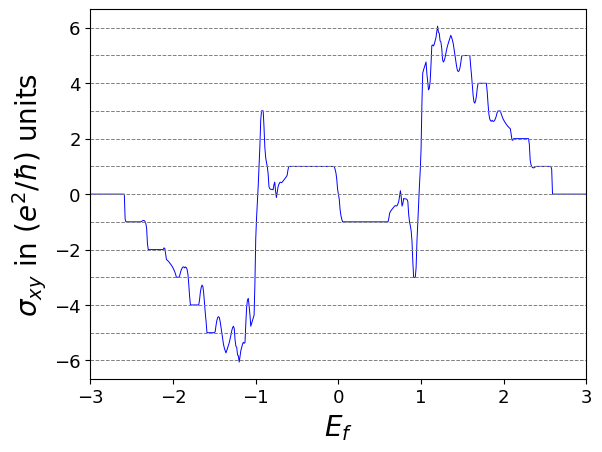

In [68]:
f = plt.figure();   
plt.plot( Ef, sigma, color='blue',linestyle='-',linewidth=0.7 )
# Add grid lines at specific y-values
for y_value in range(-6, 7):
    plt.axhline(y=y_value, color='gray', linestyle='--', linewidth=0.7)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("$E_f$", fontsize=20); plt.axis('tight');
plt.ylabel("$\sigma_{xy}$ in ($e^2/\hbar$) units", fontsize=20); plt.axis('tight');
plt.xlim(-3,3)